In [6]:
import shutil
import os

%run ./variables.ipynb
%run ./utils.ipynb
%run ../utils/data_utils.ipynb
%run ../utils/image_utils.ipynb


In [101]:
selected_taxons = get_selected_taxons(SELECTED_TAXONS)
for path in ATLAS_PATH:
    print(path)
    for taxon in os.listdir(path):
        if taxon in selected_taxons.keys():
            dir_path = os.path.join(path, taxon)
            files = [f for f in os.listdir(dir_path) if isfile(join(dir_path, f))]
            for file in files:
                split = file.split(".")
                if (len(split)>1 and split[1]=="png"):
                    source_file = os.path.join(dir_path, file)
                    target_file = os.path.join(DATASET_PATH, taxon, file)
                    check_dirs(target_file)
                    img = cv2.imread(source_file)
                    img = convert_to_square(img, new_size=256)
                    cv2.imwrite(target_file, img)

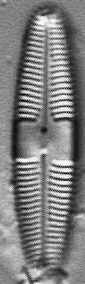

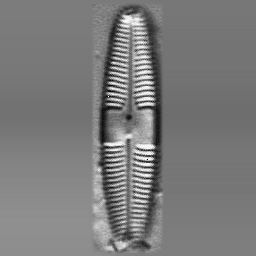

In [100]:
from IPython.display import display
from PIL import Image

def convert_to_square(image, new_size=None):
    if len(image.shape)!=2:
        image = image[:, :, 0]
    square_size = np.max(image.shape)
    h, w = image.shape[0], image.shape[1]
    delta_w, delta_h = square_size - w, square_size - h
    left, top = delta_w//2, delta_h//2    
    blur_size = int(np.max(image.shape)/4)*2+1
    blured_image=cv2.GaussianBlur(image,(blur_size,blur_size),0)
    square_image_blurred = cv2.copyMakeBorder(blured_image, top+1, delta_h-top+1, left+1, delta_w-left+1, cv2.BORDER_REPLICATE)
    square_image = square_image_blurred.copy()
    square_image[top+1:top+h+1, left+1:left+w+1] = image.copy()
    
    # Finding contours
    mask_ref=np.zeros_like(square_image).astype("uint8")
    mask_ref[top+1:top+h+1, left+1:left+w+1] = 255
    conts = cv2.findContours(mask_ref, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    
    # Blurring borders
    mask = np.zeros_like(square_image)
    mask = cv2.drawContours(mask, conts, -1, 1, 5).astype("float")
    mask = cv2.GaussianBlur(mask,(7,7),0)
    square_image=mask*square_image_blurred+(1-mask)*square_image
    if not new_size is None:
        square_image = cv2.resize(square_image, dsize=(new_size, new_size), interpolation=cv2.INTER_CUBIC)
    return square_image

path = "/mnt/nvme-storage/pfauregi/datasets/atlas/BRG/CLCT/BRG_CLCT_30000.png"
img = cv2.imread(path)
display(Image.fromarray(img))
img_squared = convert_to_square(img, new_size=256).astype("uint8")
display(Image.fromarray(img_squared))

In [54]:
np.max(img.shape)

284